CODE BLOCK: 1

In [50]:
import torch
import torch.nn as nnF
import torch.optim as optim
import torchvision
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import datasets, transforms

CODE BLOCK: 2

In [51]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [52]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ])

CODE BLOCK: 4

In [53]:
from utils import get_mnist_data

train_data, test_data = get_mnist_data(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified


CODE BLOCK: 5

In [54]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

In [55]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d770083a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


<Figure size 640x480 with 0 Axes>

CODE BLOCK: 7

In [12]:
from model import model_6

CODE BLOCK: 8

In [13]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [14]:
from utils import train, test
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model_6().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 16, 16]          18,432
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
          Dropout-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 32, 18, 18]           2,048
           Conv2d-14           [-1, 64,

CODE BLOCK: 10

In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_6().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=13, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 1


Loss=1.313373327255249 Batch_id=97 Accuracy=35.23: 100%|██████████| 98/98 [00:19<00:00,  4.97it/s]



Test set: Average loss: 1.4704, Accuracy: 4611/10000 (46.11%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 2


Loss=1.1024272441864014 Batch_id=97 Accuracy=55.62: 100%|██████████| 98/98 [00:16<00:00,  5.99it/s]



Test set: Average loss: 1.1049, Accuracy: 6000/10000 (60.00%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 3


Loss=0.9174495935440063 Batch_id=97 Accuracy=64.09: 100%|██████████| 98/98 [00:14<00:00,  6.62it/s]



Test set: Average loss: 0.9520, Accuracy: 6649/10000 (66.49%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 4


Loss=0.7995248436927795 Batch_id=97 Accuracy=69.38: 100%|██████████| 98/98 [00:15<00:00,  6.29it/s]



Test set: Average loss: 0.8800, Accuracy: 6958/10000 (69.58%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 5


Loss=0.7191280126571655 Batch_id=97 Accuracy=72.99: 100%|██████████| 98/98 [00:14<00:00,  6.61it/s]



Test set: Average loss: 0.8133, Accuracy: 7186/10000 (71.86%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 6


Loss=0.6073859333992004 Batch_id=97 Accuracy=75.96: 100%|██████████| 98/98 [00:15<00:00,  6.35it/s]



Test set: Average loss: 0.8003, Accuracy: 7268/10000 (72.68%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 7


Loss=0.6592734456062317 Batch_id=97 Accuracy=78.38: 100%|██████████| 98/98 [00:15<00:00,  6.32it/s]



Test set: Average loss: 0.7414, Accuracy: 7484/10000 (74.84%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 8


Loss=0.5499259829521179 Batch_id=97 Accuracy=80.08: 100%|██████████| 98/98 [00:15<00:00,  6.26it/s]



Test set: Average loss: 0.7005, Accuracy: 7616/10000 (76.16%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 9


Loss=0.5703257322311401 Batch_id=97 Accuracy=81.48: 100%|██████████| 98/98 [00:17<00:00,  5.59it/s]



Test set: Average loss: 0.6862, Accuracy: 7723/10000 (77.23%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 10


Loss=0.5399578213691711 Batch_id=97 Accuracy=82.86: 100%|██████████| 98/98 [00:15<00:00,  6.52it/s]



Test set: Average loss: 0.7047, Accuracy: 7682/10000 (76.82%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 11


Loss=0.48066475987434387 Batch_id=97 Accuracy=83.87: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]



Test set: Average loss: 0.6826, Accuracy: 7770/10000 (77.70%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 12


Loss=0.3918949365615845 Batch_id=97 Accuracy=84.74: 100%|██████████| 98/98 [00:15<00:00,  6.23it/s]



Test set: Average loss: 0.6471, Accuracy: 7856/10000 (78.56%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch 13


Loss=0.41488033533096313 Batch_id=97 Accuracy=85.86: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]



Test set: Average loss: 0.6566, Accuracy: 7852/10000 (78.52%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 14


Loss=0.2821512818336487 Batch_id=97 Accuracy=89.80: 100%|██████████| 98/98 [00:14<00:00,  6.56it/s]



Test set: Average loss: 0.5836, Accuracy: 8121/10000 (81.21%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 15


Loss=0.25210440158843994 Batch_id=97 Accuracy=91.22: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]



Test set: Average loss: 0.5990, Accuracy: 8121/10000 (81.21%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 16


Loss=0.24771565198898315 Batch_id=97 Accuracy=91.85: 100%|██████████| 98/98 [00:14<00:00,  6.56it/s]



Test set: Average loss: 0.6131, Accuracy: 8086/10000 (80.86%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 17


Loss=0.27118563652038574 Batch_id=97 Accuracy=92.26: 100%|██████████| 98/98 [00:15<00:00,  6.41it/s]



Test set: Average loss: 0.6242, Accuracy: 8127/10000 (81.27%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 18


Loss=0.2987218499183655 Batch_id=97 Accuracy=92.62: 100%|██████████| 98/98 [00:14<00:00,  6.54it/s]



Test set: Average loss: 0.6283, Accuracy: 8104/10000 (81.04%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 19


Loss=0.210114985704422 Batch_id=97 Accuracy=92.80: 100%|██████████| 98/98 [00:15<00:00,  6.19it/s]



Test set: Average loss: 0.6380, Accuracy: 8121/10000 (81.21%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 20


Loss=0.1827031821012497 Batch_id=97 Accuracy=93.12: 100%|██████████| 98/98 [00:15<00:00,  6.16it/s]



Test set: Average loss: 0.6502, Accuracy: 8111/10000 (81.11%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 21


Loss=0.1760978400707245 Batch_id=97 Accuracy=93.35: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]



Test set: Average loss: 0.6606, Accuracy: 8112/10000 (81.12%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 22


Loss=0.13122186064720154 Batch_id=97 Accuracy=93.56: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]



Test set: Average loss: 0.6748, Accuracy: 8095/10000 (80.95%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 23


Loss=0.2034805417060852 Batch_id=97 Accuracy=93.71: 100%|██████████| 98/98 [00:15<00:00,  6.20it/s]



Test set: Average loss: 0.6732, Accuracy: 8106/10000 (81.06%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 24


Loss=0.21612808108329773 Batch_id=97 Accuracy=94.08: 100%|██████████| 98/98 [00:15<00:00,  6.50it/s]



Test set: Average loss: 0.6889, Accuracy: 8117/10000 (81.17%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 25


Loss=0.19625265896320343 Batch_id=97 Accuracy=93.99: 100%|██████████| 98/98 [00:15<00:00,  6.35it/s]



Test set: Average loss: 0.7011, Accuracy: 8105/10000 (81.05%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 26


Loss=0.17709822952747345 Batch_id=97 Accuracy=94.22: 100%|██████████| 98/98 [00:15<00:00,  6.52it/s]



Test set: Average loss: 0.7100, Accuracy: 8072/10000 (80.72%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 27


Loss=0.16807539761066437 Batch_id=97 Accuracy=94.73: 100%|██████████| 98/98 [00:15<00:00,  6.53it/s]



Test set: Average loss: 0.6992, Accuracy: 8118/10000 (81.18%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 28


Loss=0.1713559925556183 Batch_id=97 Accuracy=94.75: 100%|██████████| 98/98 [00:16<00:00,  5.95it/s]



Test set: Average loss: 0.6990, Accuracy: 8122/10000 (81.22%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 29


Loss=0.1566600799560547 Batch_id=97 Accuracy=95.02: 100%|██████████| 98/98 [00:15<00:00,  6.52it/s]



Test set: Average loss: 0.7019, Accuracy: 8118/10000 (81.18%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 30


Loss=0.15609614551067352 Batch_id=97 Accuracy=95.10: 100%|██████████| 98/98 [00:15<00:00,  6.49it/s]



Test set: Average loss: 0.7023, Accuracy: 8108/10000 (81.08%)

Adjusting learning rate of group 0 to 2.0000e-03.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

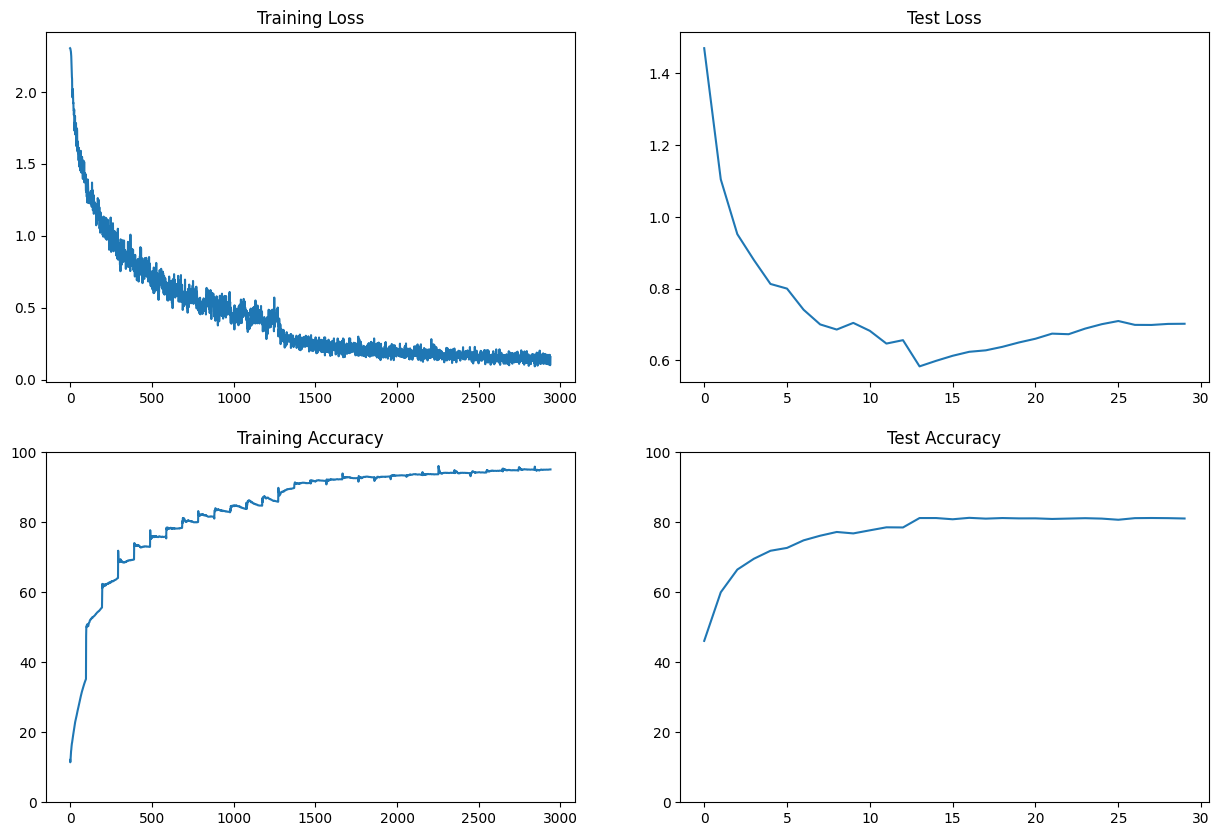

In [16]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([x.cpu().item() for x in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1,0].axis(ymin=0,ymax=100)
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1,1].axis(ymin=0,ymax=100)
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def get_incorrect_images(model,test_loader,n=10):
  incorrect_images = []
  predicted_labels = []
  correct_labels = []
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    incorrect_items = pred.ne(target.view_as(pred))
    incorrect_indices = incorrect_items.view(-1).nonzero().view(-1)
    predicted_labels.extend([item.item() for item in pred[incorrect_indices[:n-len(incorrect_images)]]])
    correct_labels.extend([item.item() for item in target.view_as(pred)[incorrect_indices[:n-len(incorrect_images)]]])
    incorrect_images.extend([item for item in data[incorrect_indices[:n-len(incorrect_images)]]])
    if len(incorrect_images)==n:
      break
  return incorrect_images,predicted_labels,correct_labels

def imshow(img):
  img = img / 2 + 0.5     # Unnormalize
  npimg = img
  npimg = np.clip(npimg, 0, 1)  # Add this line to clip the values
  return np.transpose(npimg, (1, 2, 0))  # Convert from Tensor image

fig, axes = plt.subplots(2, 5, figsize=(16, 8))

incorrect_images,predicted_labels,correct_labels = get_incorrect_images(model,test_loader,n=10)

for i, image_tensor in enumerate(incorrect_images):
    ax = axes[i // 5, i % 5]  # Get the location of the subplot
    image = image_tensor.cpu().numpy()
    ax.imshow(imshow(image))  # Display the image
    ax.set_title(f"Predicted {class_names[predicted_labels[i]]}, Actual {class_names[correct_labels[i]]}")  # Set the title as the index

plt.tight_layout()  # To provide sufficient spacing between subplots
plt.show()

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_2().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.08, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=13, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

In [ ]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([x.cpu().item() for x in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1,0].axis(ymin=0,ymax=100)
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1,1].axis(ymin=0,ymax=100)
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

incorrect_images,predicted_labels,correct_labels = get_incorrect_images(model,test_loader,n=10)

for i, image_tensor in enumerate(incorrect_images):
    ax = axes[i // 5, i % 5]  # Get the location of the subplot
    image = image_tensor.cpu().numpy()
    ax.imshow(imshow(image))  # Display the image
    ax.set_title(f"Predicted {class_names[predicted_labels[i]]}, Actual {class_names[correct_labels[i]]}")  # Set the title as the index

plt.tight_layout()  # To provide sufficient spacing between subplots
plt.show()

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_3().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.08, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=13, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

In [ ]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([x.cpu().item() for x in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1,0].axis(ymin=0,ymax=100)
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1,1].axis(ymin=0,ymax=100)
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

incorrect_images,predicted_labels,correct_labels = get_incorrect_images(model,test_loader,n=10)

for i, image_tensor in enumerate(incorrect_images):
    ax = axes[i // 5, i % 5]  # Get the location of the subplot
    image = image_tensor.cpu().numpy()
    ax.imshow(imshow(image))  # Display the image
    ax.set_title(f"Predicted {class_names[predicted_labels[i]]}, Actual {class_names[correct_labels[i]]}")  # Set the title as the index

plt.tight_layout()  # To provide sufficient spacing between subplots
plt.show()